## Image Analysis with Python and MNIST Data Set

This is built on a subset of a MNIST data downloaded through Kaggle: https://www.kaggle.com/c/digit-recognizer

It contains 42,000 28 by 28 images of handwritten digits, with the pixel intensity given for each column 

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

### Data importing and data cleaning 

In [2]:
digits = pd.read_csv('~/dropbox/projects/ucd_ml_club/digit_train.csv')
digits.head()
#digits.label.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = digits.label
print labels.head()
digits = digits.drop('label', axis = 1) # Removing the label category to make that the target variable 
print digits.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixe

In [5]:
digit_data = digits.values
digit_data = digit_data.reshape(digit_data.shape[0], 28, 28) # 42,000 by 28, by 28

In [6]:
digit_data[1].shape # confirming the data changed shape 

(28, 28)

## Visualizing the Data, or
### What does this crap actually mean? 

We'll convert the cells from the simple pixels to something people can actually understand 

Next four cells are based on code written by Bargava Subramanian, for his 2016 SciPy talk on Deep Learning and Image Recognition. 
The code is availible here: https://github.com/rouseguy/scipyUS2016_dl-image/blob/master/notebooks/2.%20Problem%20Definition.ipynb

A video of the talk is availible here: https://www.youtube.com/watch?v=7qk1jmMLedQ

Matplotlib is one of the more popular vizualization libraries for Python, and its syntax is based on Matlab's. You can find more about it here: http://matplotlib.org/

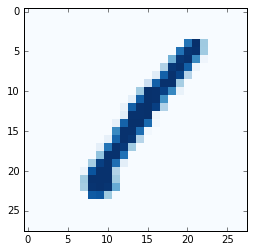

In [7]:
ax = plt.figure().add_subplot(1, 1, 1)
plot = ax.imshow(digit_data[0], cmap = 'Blues')
plot.set_interpolation('nearest')

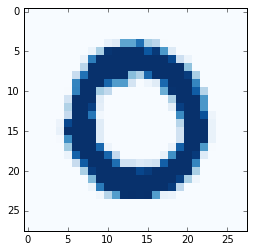

In [8]:
ax = plt.figure().add_subplot(1, 1, 1)
plot = ax.imshow(digit_data[1], cmap = 'Blues')
plot.set_interpolation('nearest')

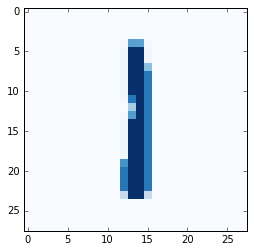

In [9]:
ax = plt.figure().add_subplot(1, 1, 1)
plot = ax.imshow(digit_data[2], cmap = 'Blues')
plot.set_interpolation('nearest')

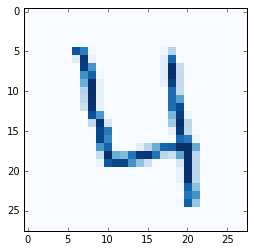

In [10]:
ax = plt.figure().add_subplot(1, 1, 1)
plot = ax.imshow(digit_data[3], cmap = 'Blues')
plot.set_interpolation('nearest')

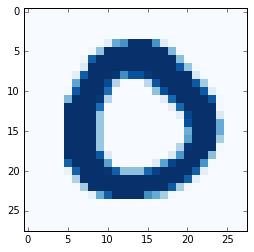

In [11]:
ax = plt.figure().add_subplot(1, 1, 1)
plot = ax.imshow(digit_data[4], cmap = 'Blues')
plot.set_interpolation('nearest')

### Creating the Training and Test Sets to Feed into the Model

We'll train the data on half the observations, see how the model performs, and then see how the models extends to observations that it hasn't seen before. If the model performs substantially worse, we've *overfit* our data—given too much weight to the randomness in the training data. 

We can also *underfit* our data, where the model is so conservative it doesn't perform well on data it was trained on, or data it hasn't seen before. 

Since we can create very intricate and complex models using machine learning methods, we need to always be on guard to avoid overfitting. 

In [13]:
test_data = digits[:21000]
print("Test data observations: {}".format(test_data.shape[0]))
test_outcomes = labels[:21000].values
training_data = digits[21000:]
print("Training data observations: {}".format(training_data.shape[0]))
training_outcomes = labels[21000:].values

# Sanity checks; if these logical tests fail, we'll throw an error 
# Does each test and training example have a corresponding label?
assert len(test_outcomes) == test_data.shape[0]
assert len(training_outcomes) == training_data.shape[0]

# Does each observation have 784 columns? 
assert test_data.shape[1] == 784 
assert training_data.shape[1] == 784

Test data observations: 21000
Training data observations: 21000


### Now for the Machine Learning

We'll use a Random Forest Classifier from Scikit-Learn that will study the pixel shading and make it's decision.

In the interest of time, the random forest will use 250 regression trees in the forest, that won't go more than 10 nodes deep, and each split will require 100 samples on each side. 

To read more about random forests, I highly recommend Chapter 8 of *Introduction to Statistical Learning* by James, Witten, Hastie, & Tibshirani, which will be avaible on our resources page through the library. 

You can find more about Scikit-Learn here: http://scikit-learn.org/stable/index.html

And you can read more Scikit-Learn's Random Forest Classifier here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

For reference, this classifier takes about 30 seconds to train on my moderately powered, 13" 2014 MacBook Pro

This cell will initialize the Random Forest Classifier with the parameters I want it to have. 

It will also train the model on the training data, and then check how accurate the model does on the data it trained on.

Scikit-Learn allows us to save the classifier to a disk to use in the future. You can read more about it here https://stackoverflow.com/questions/10592605/save-classifier-to-disk-in-scikit-learn, and here http://scikit-learn.org/stable/modules/model_persistence.html

In [14]:
DarkWoods = RandomForestClassifier(n_estimators = 250, max_depth = 10, min_samples_split = 100) 
handwriting_model = DarkWoods.fit(training_data, training_outcomes) # training the data
accuracy = handwriting_model.score(training_data, training_outcomes) # getting the accuracy
print("The model accurately classified {}% of the observations it was trained on".format(round(accuracy*100, 3)))

The model accurately classified 94.352% of the observations it was trained on


We'll use the handwriting_model to make predictions for the test data

In [16]:
test_preds = handwriting_model.predict(test_data)

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_outcomes, test_preds)
print("The model accurately classified {}% of the observations it had not seen before".format(round(accuracy*100, 3)))

The model accurately classified 92.471% of the observations it had not seen before


To see the accuracy in action, we'll check out the first 25 predictions for the test set and compare them to their true values. 

In [18]:
test_preds[:25] # What did the model think the values were?

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 8, 0, 7, 8, 8, 6, 2,
       0, 2])

In [19]:
test_outcomes[:25] # What were the true values?

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6, 2,
       0, 2])

Since the Random Forest Regressor uses a random number generator to build its model, you will get slightly different predictions each time. Two consistent disagreements when I trained my model were for points 16 and 19. We'll see the predictions, true values, and how they look to us.

In [20]:
print("The model believed point 19 was a {} when the value was actually a {}".format(
        test_preds[19], test_outcomes[19]))

The model believed point 19 was a 8 when the value was actually a 5


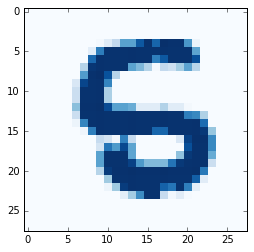

In [21]:
ax = plt.figure().add_subplot(1, 1, 1)
plot = ax.imshow(digit_data[19], cmap = 'Blues')
plot.set_interpolation('nearest')

In [22]:
print("The model believed point 19 was a {} when the value was actually a {}".format(
        test_preds[16], test_outcomes[16]))

The model believed point 19 was a 8 when the value was actually a 2


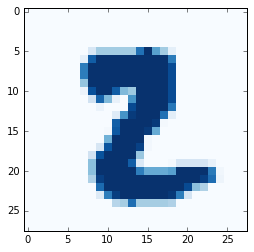

In [23]:
ax = plt.figure().add_subplot(1, 1, 1)
plot = ax.imshow(digit_data[16], cmap = 'Blues')
plot.set_interpolation('nearest')